In [71]:
import fitparse as Fit
import matplotlib.pyplot as plt
import random
import numpy

In [2]:
ride = Fit.FitFile('Rides/NCAR.fit')

In [3]:
seen = {}
for x in ride:
    if str(x) not in seen:
        print(x)
        seen[str(x)] = True

file_id (#0)
developer_data_id (#207)
field_description (#206)
event (#21)
device_info (#23)
unknown_65281 (#65281)
sport (#12)
workout (#26)
record (#20)
hr_zone (#8)
power_zone (#9)
unknown_65280 (#65280)
lap (#19)
segment_lap (#142)
unknown_65282 (#65282)
session (#18)
activity (#34)


In [12]:
laps = []
for lap in ride.get_messages('lap'):
    laps.append({
        'start_time': lap.get_value('timestamp'),
        'elapsed_time': lap.get_value('total_elapsed_time')
    })
print(laps)

[{'start_time': datetime.datetime(2020, 8, 7, 17, 35, 36), 'elapsed_time': 910.0}, {'start_time': datetime.datetime(2020, 8, 7, 17, 41, 44), 'elapsed_time': 368.0}, {'start_time': datetime.datetime(2020, 8, 7, 18, 54, 31), 'elapsed_time': 4367.0}]


In [29]:
records = []
for record in ride.get_messages('record'):
    records.append({
        'timestamp': record.get_value('timestamp'),
        'lat': record.get_value('position_lat'),
        'lon': record.get_value('position_long'),
        'speed': record.get_value('speed'),
        'altitude': record.get_value('altitude'),
        'grade': record.get_value('grade'),
        'heartrate': record.get_value('heart_rate'),
        'cadence': record.get_value('cadence'),
        'power': record.get_value('power'),
    })
for record in records[:10]:
    print(record)

{'timestamp': datetime.datetime(2020, 8, 7, 17, 20, 26), 'lat': 477292635, 'lon': -1255780625, 'speed': 3.798, 'altitude': None, 'grade': None, 'heartrate': None, 'cadence': None, 'power': None}
{'timestamp': datetime.datetime(2020, 8, 7, 17, 20, 27), 'lat': 477292316, 'lon': -1255780625, 'speed': 3.83, 'altitude': 1586.4, 'grade': 0.67, 'heartrate': 149, 'cadence': 81, 'power': 171}
{'timestamp': datetime.datetime(2020, 8, 7, 17, 20, 28), 'lat': 477291952, 'lon': -1255780534, 'speed': 3.864, 'altitude': 1586.1999999999998, 'grade': 0.13, 'heartrate': 150, 'cadence': 82, 'power': 171}
{'timestamp': datetime.datetime(2020, 8, 7, 17, 20, 29), 'lat': 477291543, 'lon': -1255780534, 'speed': 3.902, 'altitude': 1586.4, 'grade': 0.66, 'heartrate': 151, 'cadence': 82, 'power': 166}
{'timestamp': datetime.datetime(2020, 8, 7, 17, 20, 30), 'lat': 477291179, 'lon': -1255780534, 'speed': 3.922, 'altitude': 1586.6, 'grade': 1.01, 'heartrate': 151, 'cadence': 83, 'power': 167}
{'timestamp': datetime

In [129]:
def getAxis(ls, axis):
    return [x[axis] for x in ls]

def binValues(ls, key, bins):
    hist = {}
    for i in range(len(bins) + 1):
        hist[i] = []
    for x in ls:
        for i in range(len(bins)):
            if x[key] < bins[i]:
                hist[i+1].append(x)
                break
    return hist

def plotMap(records):
    x = getAxis(records, 'lon')
    y = getAxis(records, 'lat')
    plt.scatter(x,y)
    plt.axis('equal')
    
def plotAttr(records, attr, x_axis='timestamp', c='C0'):
    x = getAxis(records, x_axis)
    y = getAxis(records, attr)
    plt.plot(x,y, c=c)
    label = plt.ylabel(attr.capitalize())
    label.set_color(c)

In [78]:
lap_records = binValues(records, 'timestamp', getAxis(laps, 'start_time'))
for x in bins:
    print(x, len(bins[x]))

0 0
1 907
2 368
3 3969


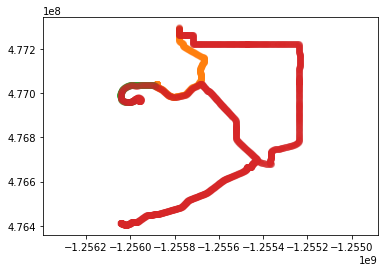

In [81]:
for lap_num in lap_records:
    segment = lap_records[lap_num]
    x = getAxis(segment, 'lon')
    y = getAxis(segment, 'lat')
    plt.scatter(x,y, alpha=0.1)
    plt.axis('equal')

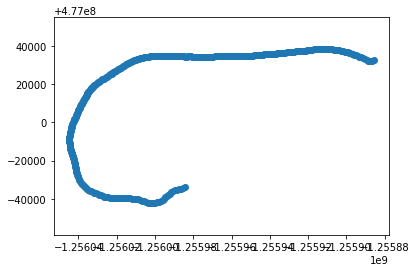

In [93]:
plotMap(lap_records[2])

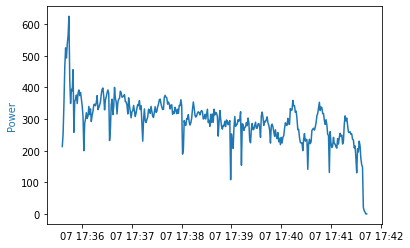

In [135]:
plotAttr(lap_records[2], 'power')

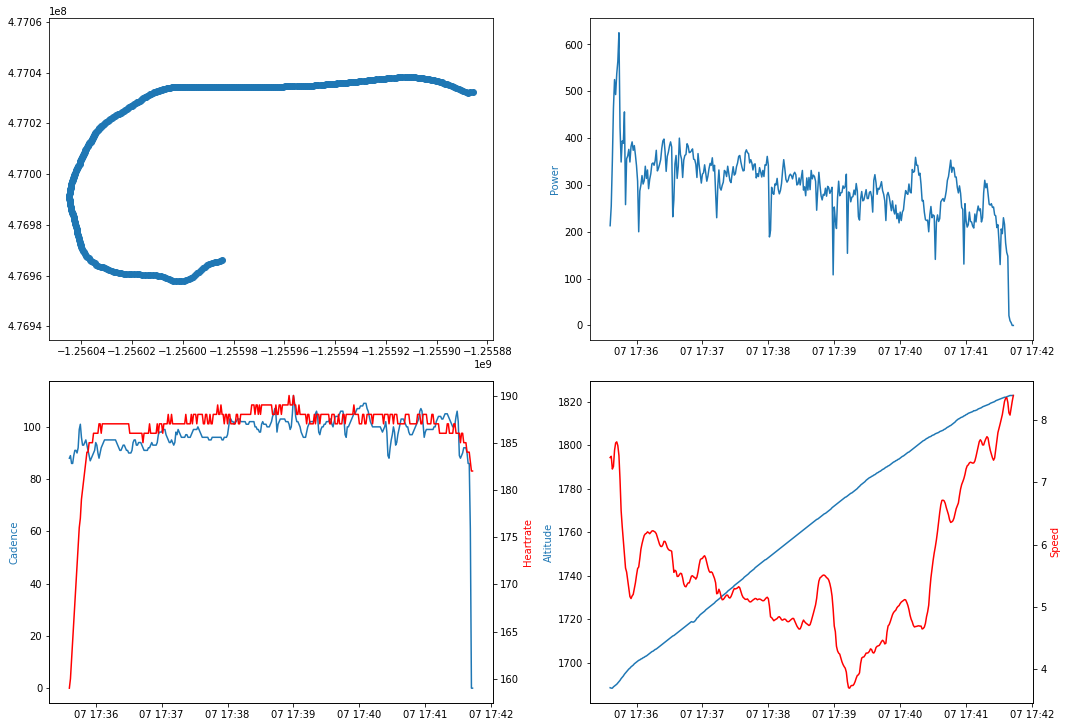

In [138]:
segment = lap_records[2]
plt.figure(figsize=(15,15))
sub_x, sub_y = 3,2
plt.subplot(sub_x,sub_y,1)
plotMap(segment)

plt.subplot(sub_x,sub_y,2)
plotAttr(segment, 'power')

plt.subplot(sub_x,sub_y,3)
plotAttr(segment, 'cadence')
plt.twinx()
plotAttr(segment, 'heartrate', c='r')


plt.subplot(sub_x,sub_y,4)
plotAttr(segment, 'altitude')
plt.twinx()
plotAttr(segment, 'speed', c='r')

plt.tight_layout()